<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#PCA-(Principal-Component-Analysis)" data-toc-modified-id="PCA-(Principal-Component-Analysis)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA (Principal Component Analysis)</a></span><ul class="toc-item"><li><span><a href="#Linear-PCA" data-toc-modified-id="Linear-PCA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear PCA</a></span></li><li><span><a href="#Randomized-PCA" data-toc-modified-id="Randomized-PCA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Randomized PCA</a></span></li><li><span><a href="#Incremental-PCA" data-toc-modified-id="Incremental-PCA-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Incremental PCA</a></span></li><li><span><a href="#Kernel-PCA" data-toc-modified-id="Kernel-PCA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Kernel PCA</a></span></li><li><span><a href="#Optimize-Hyperparameters" data-toc-modified-id="Optimize-Hyperparameters-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Optimize Hyperparameters</a></span></li></ul></li><li><span><a href="#t-SNE-(t-Distributed-Stochastic-Neighbor-Embedding)" data-toc-modified-id="t-SNE-(t-Distributed-Stochastic-Neighbor-Embedding)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>t-SNE (t-Distributed Stochastic Neighbor Embedding)</a></span><ul class="toc-item"><li><span><a href="#Effective-t-SNE" data-toc-modified-id="Effective-t-SNE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Effective t-SNE</a></span></li></ul></li><li><span><a href="#LLE-(Locally-Linear-Embedding)" data-toc-modified-id="LLE-(Locally-Linear-Embedding)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLE (Locally Linear Embedding)</a></span></li><li><span><a href="#LDA-(Linear-Discriminant-Analysis)-(supervised)" data-toc-modified-id="LDA-(Linear-Discriminant-Analysis)-(supervised)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LDA (Linear Discriminant Analysis) (supervised)</a></span></li></ul></div>

<font size="5.8">Dimensionality Reduction</font>  

Most application of Machine Learning are based on supervised learning (labels are available); however, there may be vast majority of the available without labels. Dimensionality reduction is an unsupervised learning technique. It refers to techniques for reducing the number of input variables while keeping as much of the variability in the original data as possible. It is often useful to reduce the dimensionality when dealing with high dimensional data. This can be done by projecting the data to a lower dimensional subspace which captures the essence (most important) of the data. Dimensionality reduction lead to huge reduction in training time. Visualization of high-dimensional data can be achieved through dimensionality reduction. Dimensionality reduction can also reduce multicollinearity, mitigate overfitting problem and image compression. In this notebook, top dimensionality reduction algorithms including PCA, t-SNE, LLE and LDA will be discussed and implemented in Python.

Python functions and data files to run this notebook are in my [Github](https://github.com/MehdiRezvandehy/Dimensionality_Reduction.git) page.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

# Introduction

We may have thousands or millions of features for each training instance. This not only makes the training process very slow but also make it harder to find a good solution. This problem is called *curse of dimensionality* which is classified as unsupervised learning. We can remove features to keep the most important ones; however, similar to compress an image that reduces the quality, reducing dimensionality does lead to lose some information. In the meantime, although the training process will be faster, the performance of your model may be worse due to losing some information. So, first we should train model without removing dimension. If training is so slow then we can apply dimensionality reduction.

The main advantage of Dimensionality Reduction are:

1. **Data Visualization**

   Data visualization plays an important role in Exploratory Data Analysis. However, it is difficult visualizing high-dimensional data, for example plots with dimension higher than 3D (4D, 5D ... ).  Dimensionality Reduction can convert the original data into 2 or 3-dimensional data and then make 2D and 3D plots.


2. **Reduce Overfitting**

   Dimensionality reduction can be used to mitigate overfitting by finding a lower number of variables or removes the least important variables from the model. That will remove some noise in the data and reduce the model’s complexity. This approach help to mitigate overfitting.
   
   
3. **Removes Multicollinearity**

   Multicollinearity signifies the correlation between input variables (predictors) in the dataset. This may negatively affect the performance of your regression and classification models. It will affect the interpretability. Dimensionality reduction can mitigate existing multicollinearity between the variables. 

# PCA (Principal Component Analysis)

Training instances are unlikely to spread out uniformly across all dimensions (features). Some features are correlated and other features are approximately constant. Thereby, a much lower-dimensional subspace of the high-dimensional space can be fitted to data that all training instances can actually lie within on the surface. This might seem a little confusing. Lets see a simple example below. Left Figure shows a 3D dataset of variables x1, x2, and x3; these variables are correlated with each other. Right Figure shows a 2D subspace fitted to the data that all instances are closed to lie on this plane. This is a lower-dimensional (2D) subspace of the high-dimensional (3D) space

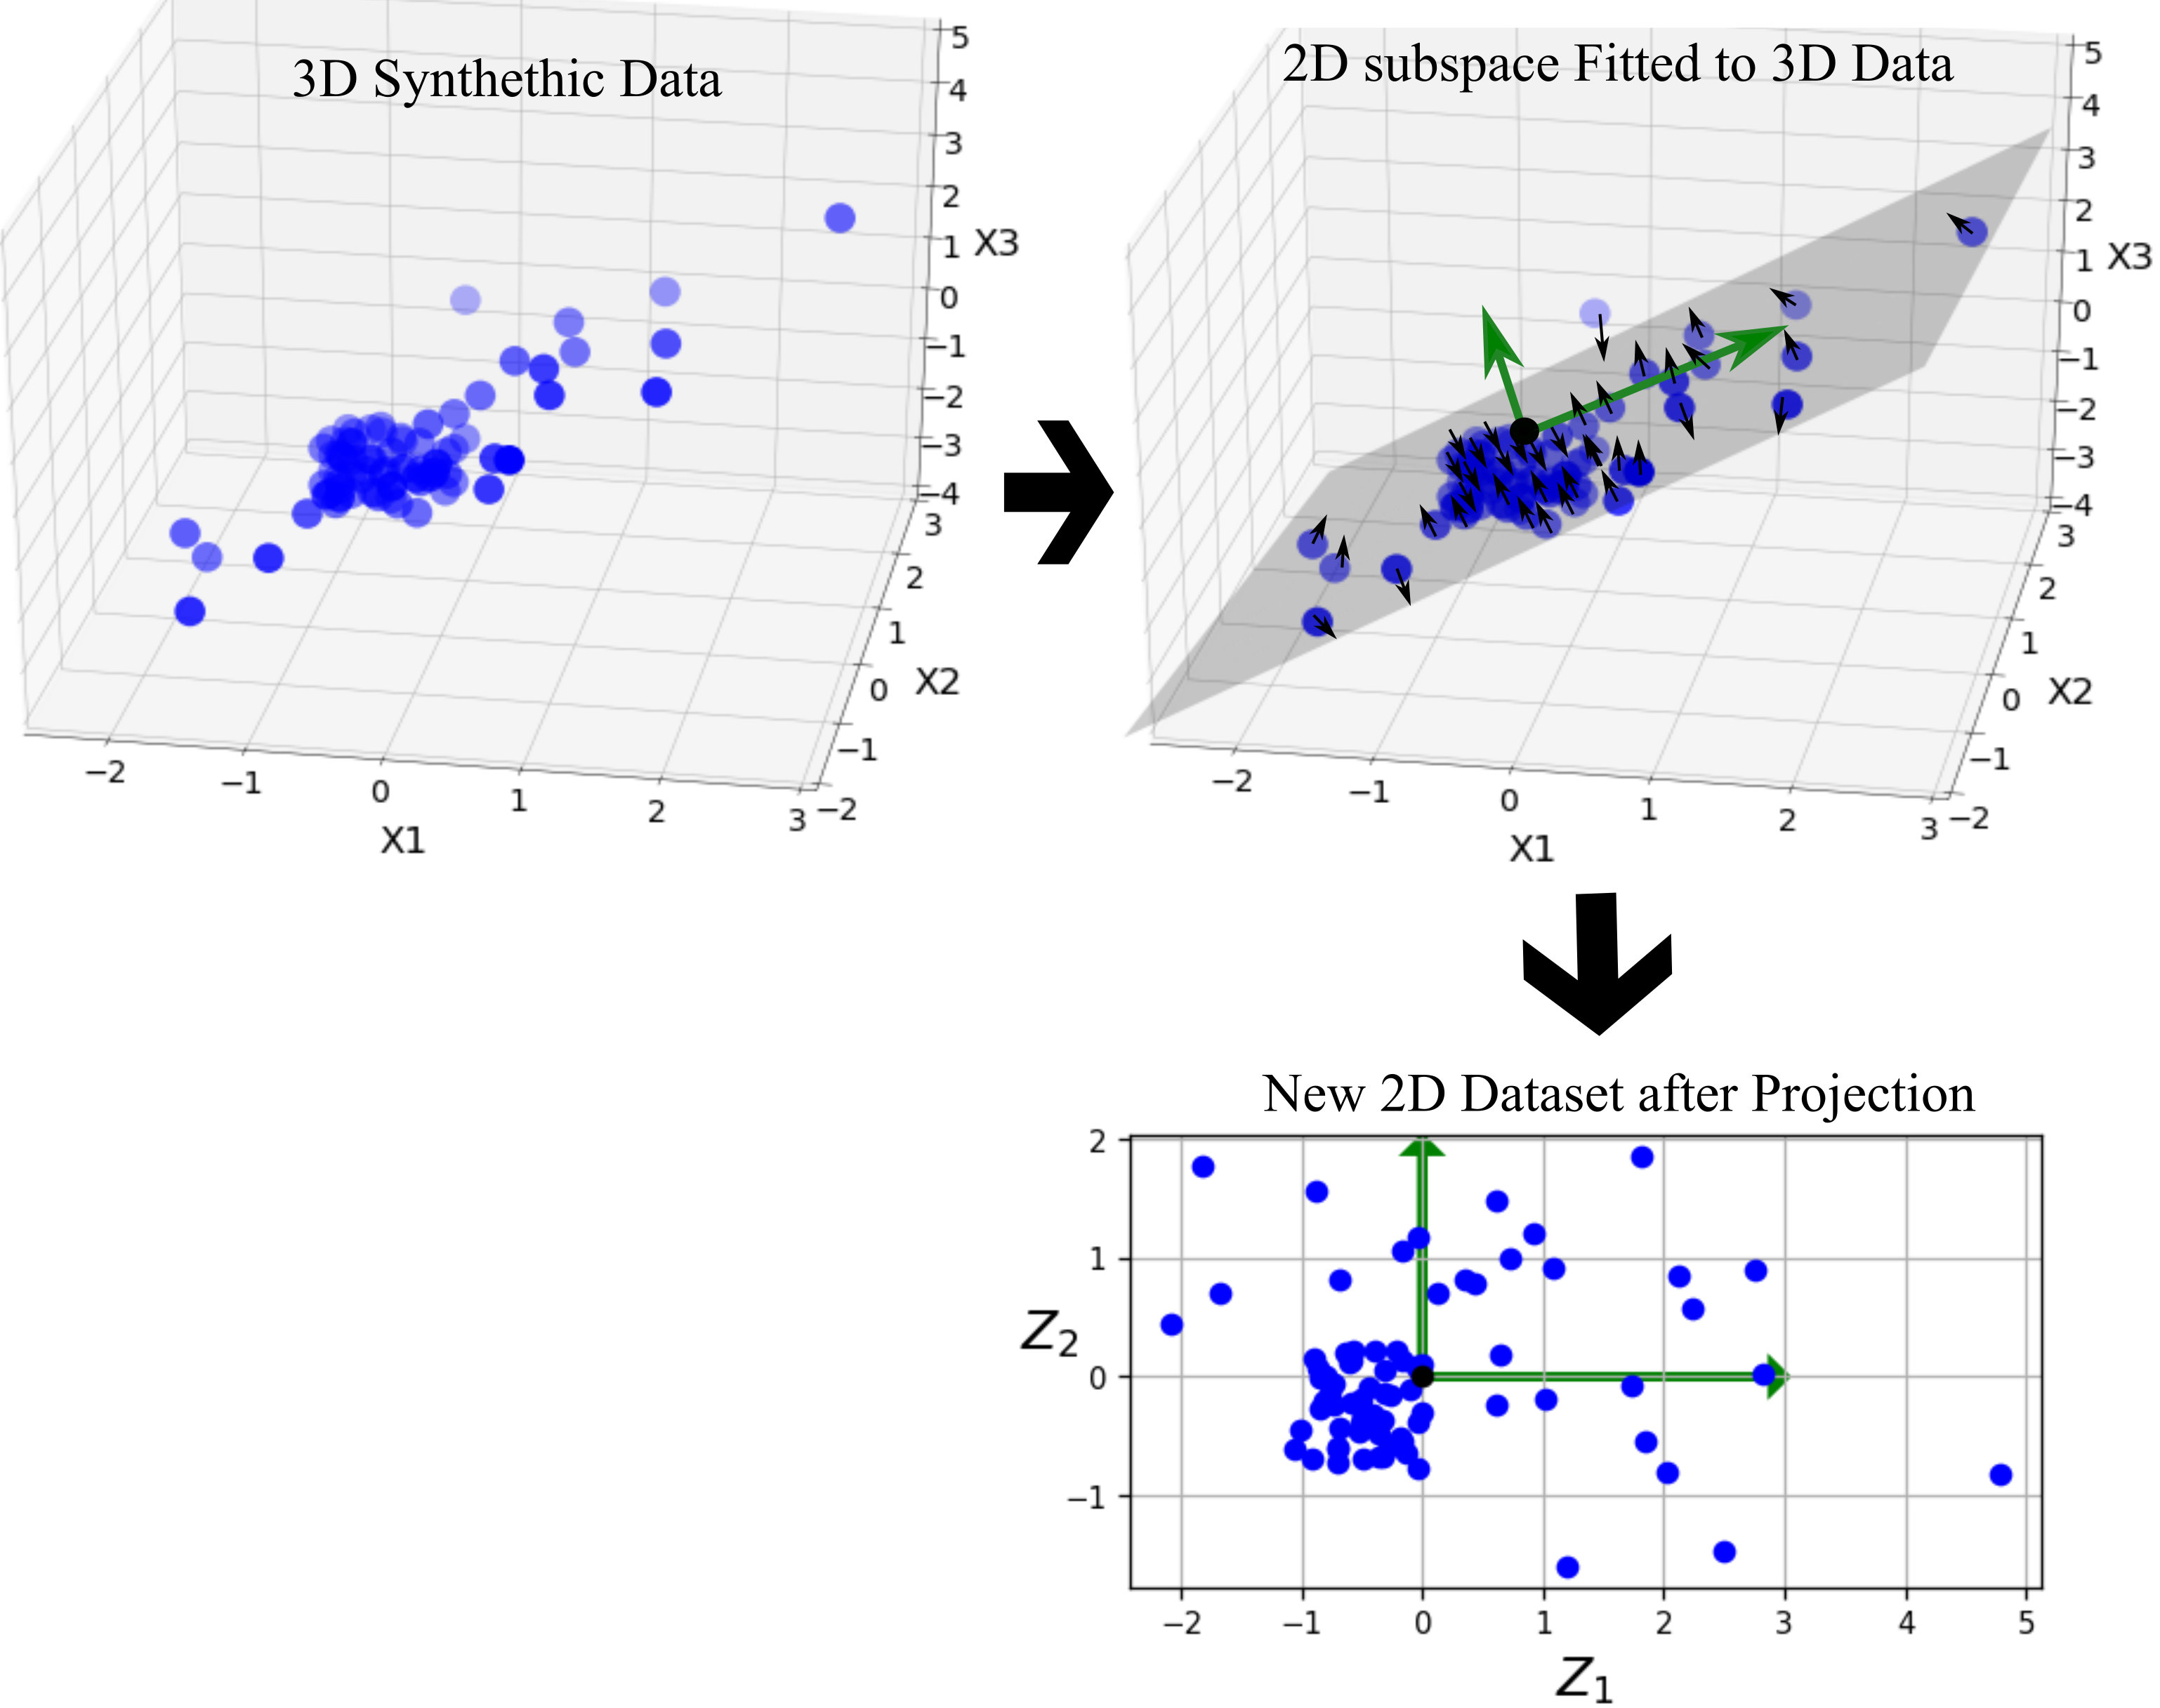

Now if every training instance is projected perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), a new 2D dataset shown is generated in bottom right Figure. It means we have reduced dimension of the dataset from 3D to 2D. New features z1 and z2 are the coordinates of the projections on the plane. The 2D data set shows much better representation of data with clusters and outliers. We can apply this approach to convert high-dimensional data to any lower dimension.

The most common dimensionality reduction algorithm is Principal Component Analysis (PCA). As it was shown in Figure above, PCA first identifies the lower-dimensional hyperplane (2D subsurface in Figure above) that lies closest to the data, and then it projects the data onto it. Lets consider a simple simple 2D dataset on the left Figure below. There is one-dimensional
hyperplanes **C1**, **C2**, **C3** fitted to this data set. Right Figures show the result of the projection of this dataset onto each of **C1**, **C2**, **C3** hyperplanes. The projection on the **C1** hyperplane preserves the highest variance while the projection on the **C3** hyperplane has the lowest variance. It is clear that we should choose the axis that preserves the maximum variance, due to losing much less information than the other projections. We can also say that **C1** is the axis that minimizes the mean squared distance between the original dataset and its projection.

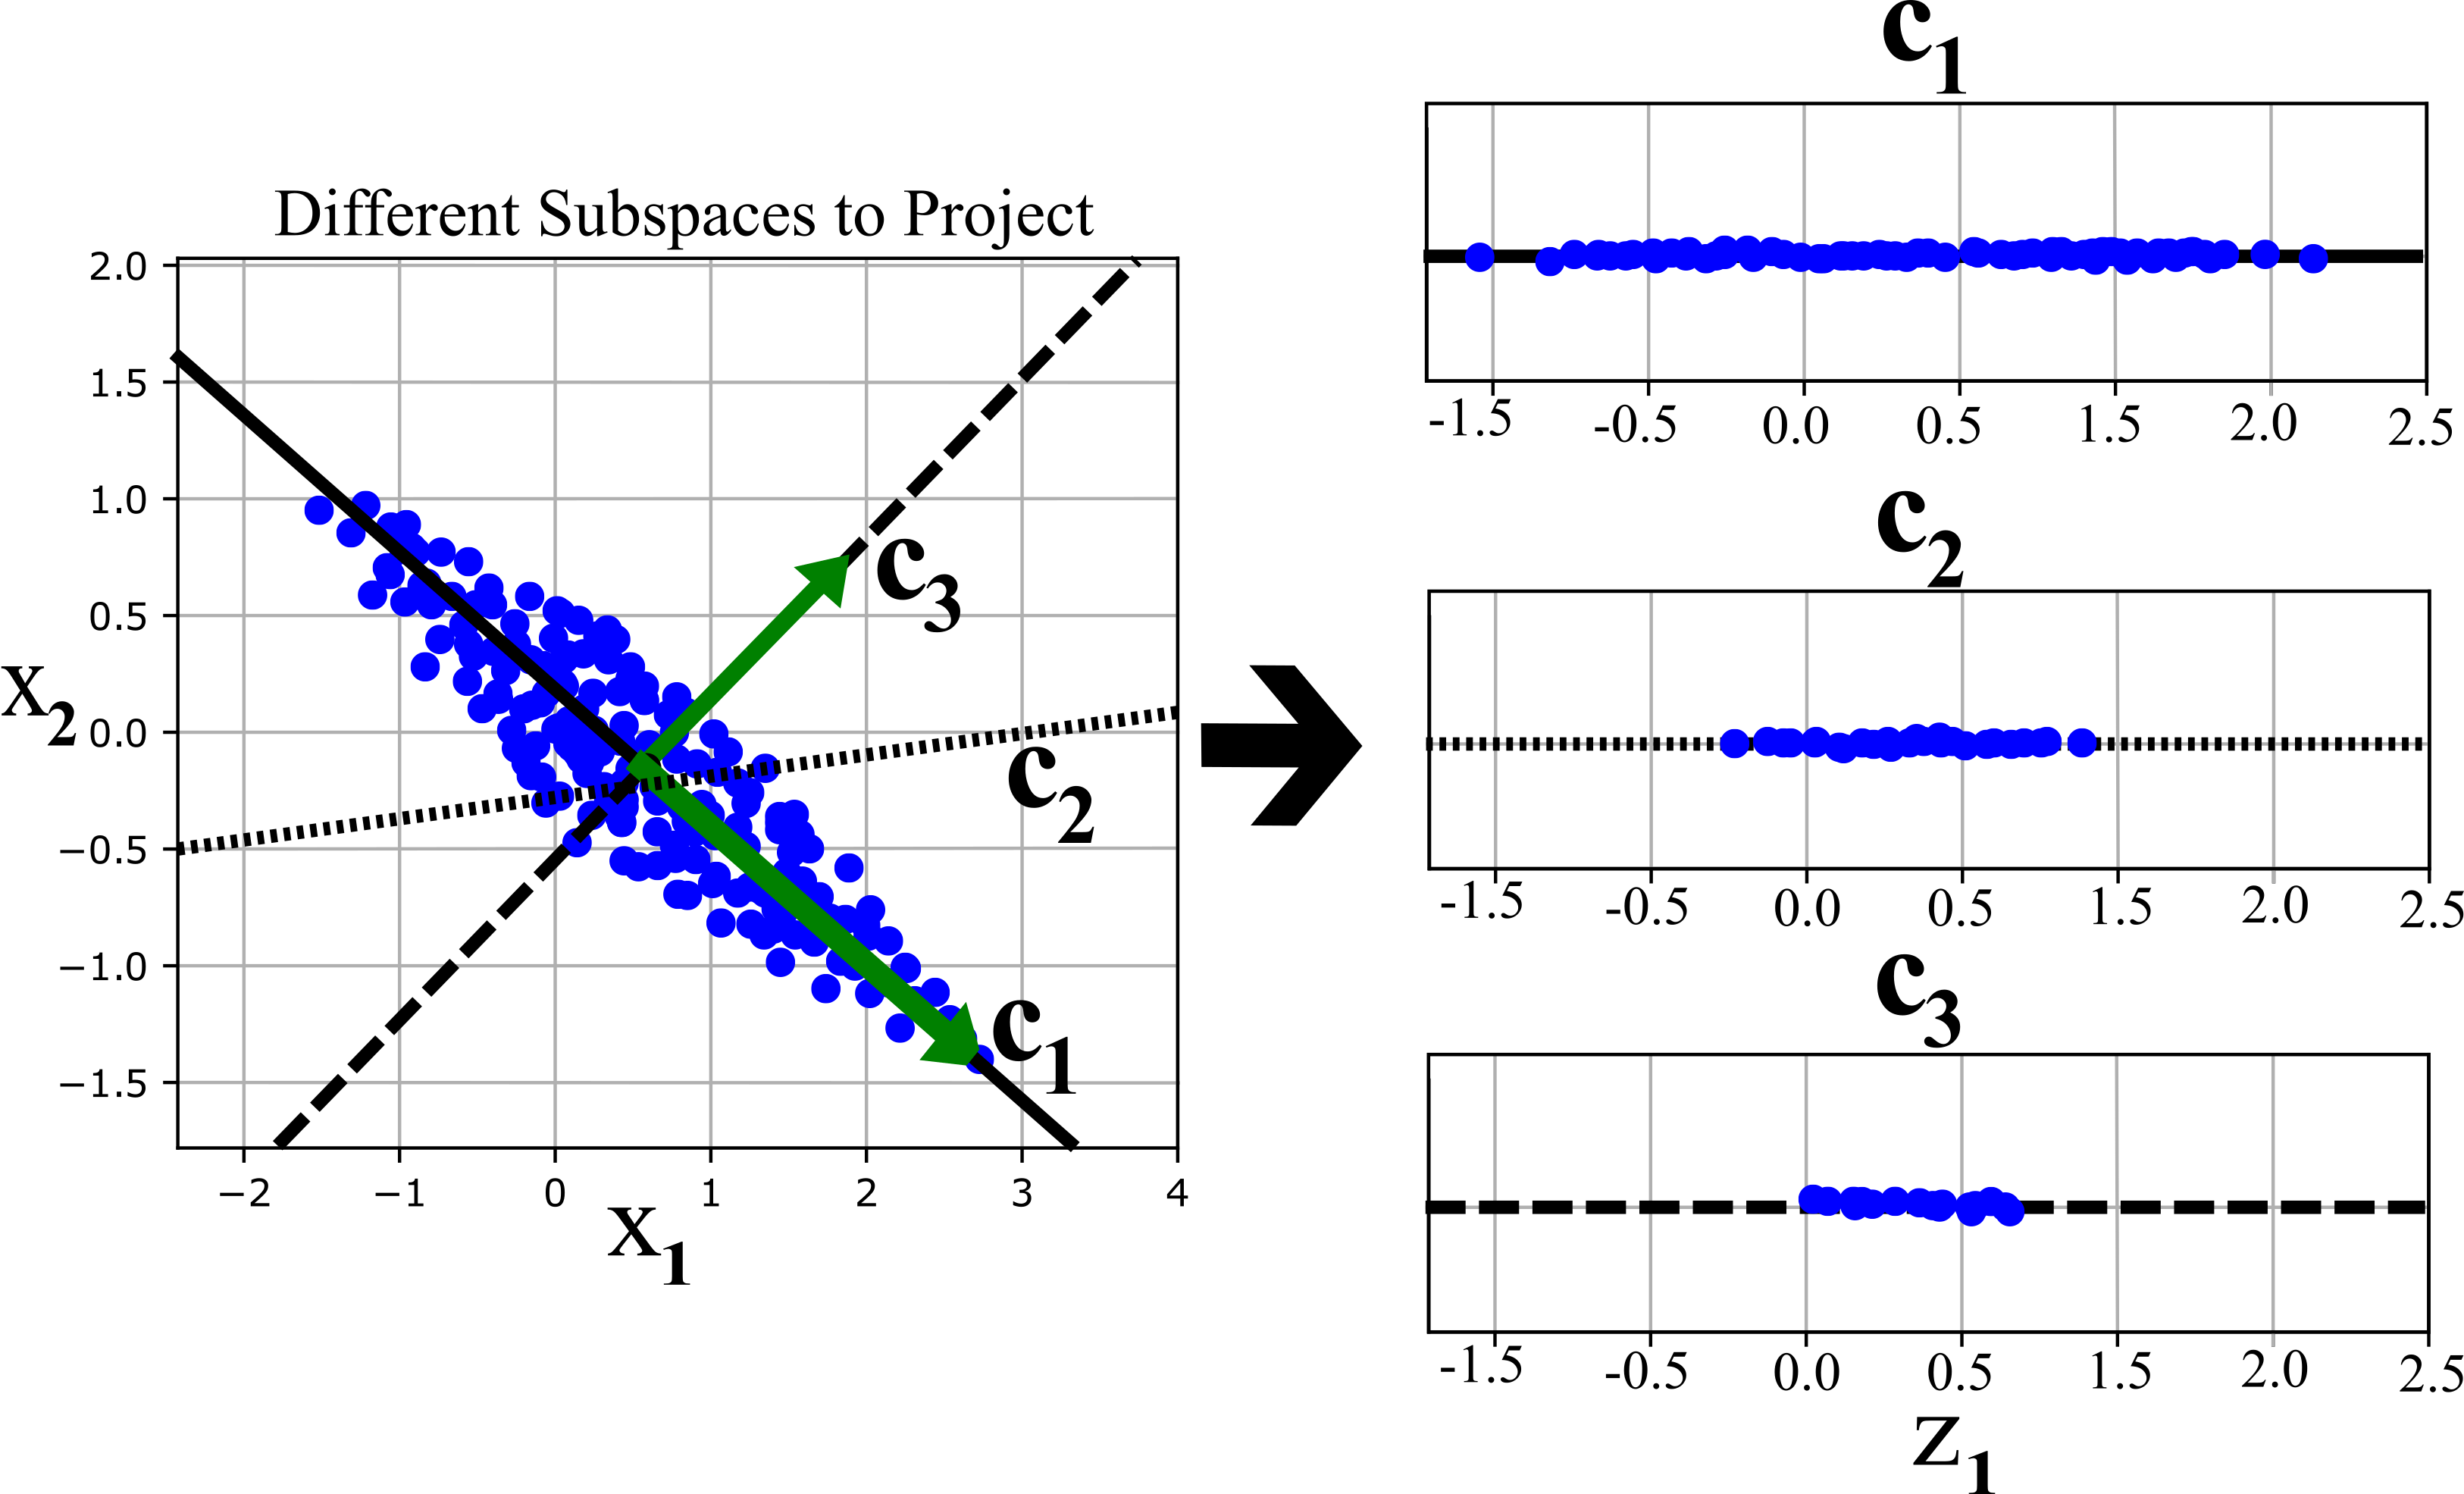

First data set used in this notebook for dimensionality reduction is [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) data set. [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [2]:
data = load_wine()
d = pd.DataFrame(data=data.data, columns=data.feature_names)
d['class'] = load_wine(True)[1]

# Build a classification task using 3 informative features
cols = [c for c in d.columns if c != 'class']
X_wine = d[cols]
y_wine = d['class']

d.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

Different PCA apporaches are applied for [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) below:

## Linear PCA

In [3]:
pca = PCA(n_components = 2)
X_pcs = pca.fit_transform(X_wine)

c1 = pca.components_.T[:, 0]   # 1st principal component
c2 = pca.components_.T[:, 1]   # 2nd principal component

print('First Principal Component:',c1)
print('Second Principal Component:',c2)

First Principal Component: [ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
  1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
  6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
  9.99822937e-01]
Second Principal Component: [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
  9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
  5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
 -1.77738095e-02]


In [4]:
pca.explained_variance_ratio_

array([0.99809123, 0.00173592])

In [5]:
# Choose dimension for 0.999 variance contribution
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.999) + 1
d

2

In [6]:
# or we can choose required dimension 
pca_ = PCA(n_components=2)
X_reduced = pca_.fit_transform(X_wine)

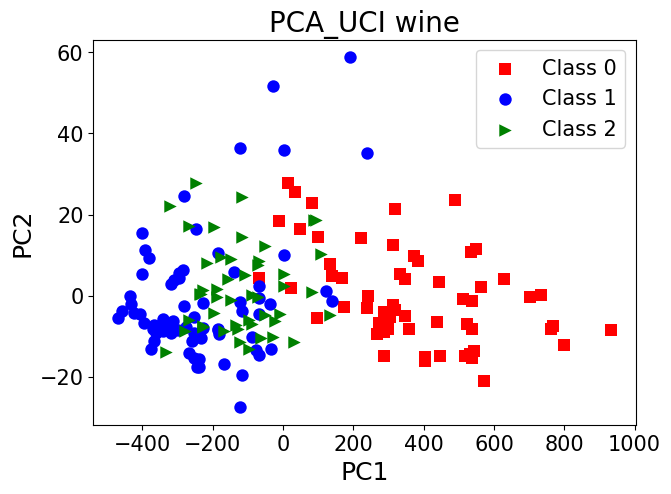

In [7]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(X_reduced[:,0][y_wine==0], X_reduced[:,1][y_wine==0], marker='s',color='r',s=80,lw = 0,label='Class 0')
plt.scatter(X_reduced[:,0][y_wine==1], X_reduced[:,1][y_wine==1], marker='o',color='b',s=80,lw = 0,label='Class 1')
plt.scatter(X_reduced[:,0][y_wine==2], X_reduced[:,1][y_wine==2], marker='>',color='g',s=80,lw = 0,label='Class 2')

plt.title('PCA_UCI wine',fontsize=20)
plt.xlabel('PC1',fontsize=18)
plt.ylabel('PC2',fontsize=18)
plt.legend()
plt.show()

## Randomized PCA

  If svd_solver hyperparameter is set to "randomized", Scikit-Learn uses a stochastic algorithm called Randomized PCA that quickly finds an approximation of the first d principal components. **So, it is dramatically faster.**

In [8]:
rnd_pca = PCA(n_components=2, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_wine)

Scikit-Learn automatically uses the randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m.

## Incremental PCA

  One problem with the implementations of PCA is that they require the whole training set to fit in memory in order for the algorithm to run. Fortunately, Incremental PCA (IPCA) algorithms have been developed: we can split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is useful for large training sets, and also to apply PCA online.

In [9]:
n_batches = 20
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X_wine, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_wine)

Alternatively, NumPy’s `memmap` class can be used, which allows to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory. The IncrementalPCA class uses only a small part of the array at any given time, so, the memory usage remains under control:

In [10]:
#X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
#batch_size = m // n_batches
#inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
#inc_pca.fit(X_mm)

## Kernel PCA

  Kernel trick is a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression with Support Vector Machines. Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space.

  The same trick can be applied to PCA, enabling to perform complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA). 

Second data set for dimensionality reduction in this notebook is Swiss Roll which have non-linear pattern. See the code below how to generate a synthetic Swiss Roll:

In [11]:
from sklearn import manifold, datasets
swiss_roll, sr_color = datasets.make_swiss_roll(n_samples=2500, random_state=0)

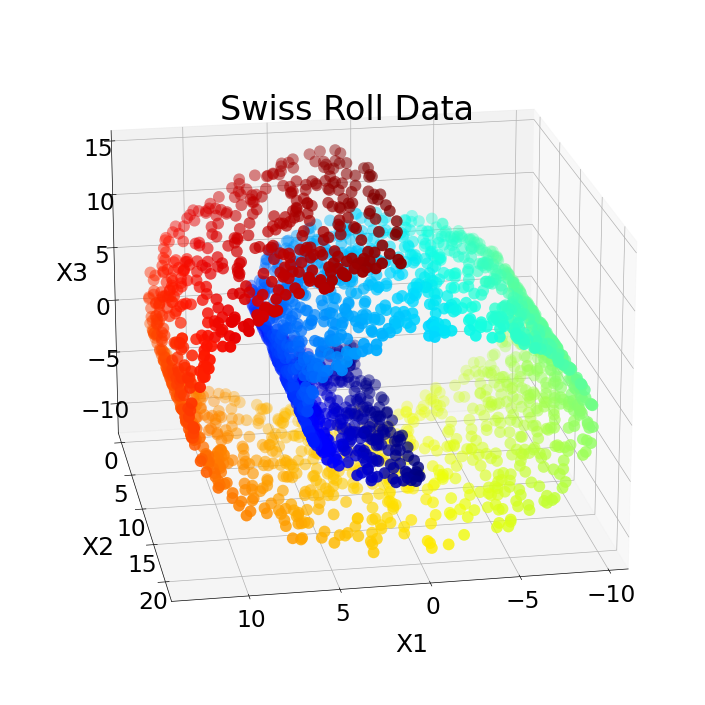

In [12]:
font = {'size'   : 28}
plt.rc('font', **font)

fig = plt.figure(figsize=(15,15), dpi= 60,facecolor='w') 
ax = fig.add_subplot(projection='3d') 

pnt3d=ax.scatter(swiss_roll[:,0], swiss_roll[:,1], swiss_roll[:,2], 
                 c=sr_color,s=200,lw = 0,cmap='jet')

ax.set_xlabel('X1',fontsize=30, labelpad =30.1)
ax.set_ylabel('X2',fontsize=30, labelpad =25.1)
ax.set_zlabel('X3',fontsize=30, labelpad =19.1)
ax.set_title('Swiss Roll Data ',fontsize=40, y=0.9)
ax.view_init(elev=20, azim=80)

Different PCA approaches are applied for the above synthetic Swiss Roll.

In [13]:
# linear Kernel PCA
kernel_lin = KernelPCA(n_components = 2, kernel="linear")
pca_kernel_lin = kernel_lin.fit_transform(swiss_roll)

In [14]:
# rbf (Radial Basis Function) Kernel PCA
kernel_rbf     = KernelPCA(n_components = 2, kernel="rbf")
pca_kernel_rbf = kernel_rbf.fit_transform(swiss_roll)

In [15]:
# sigmoid Kernel PCA
kernel_sigmoid  = KernelPCA(n_components = 2, kernel="sigmoid")
pca_kernel_sigmoid = kernel_sigmoid.fit_transform(swiss_roll)

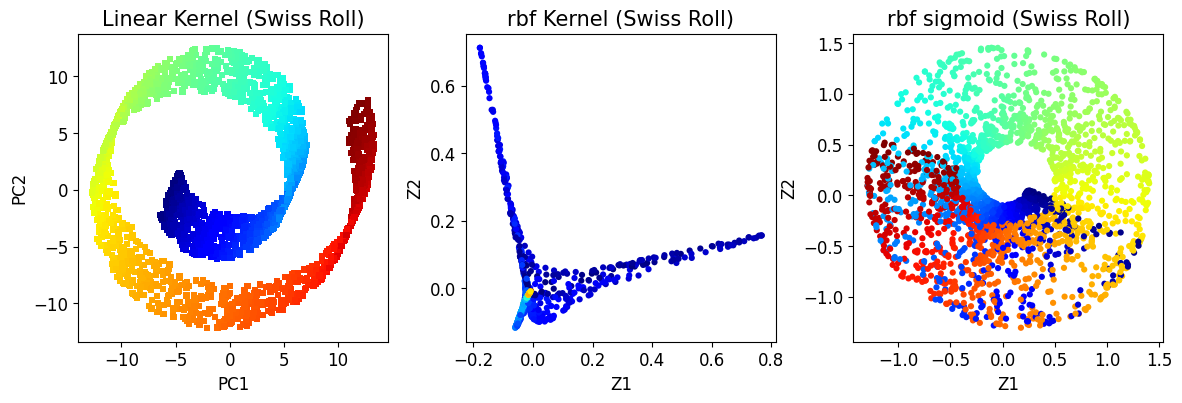

In [16]:
font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(14,4), dpi= 100, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,3,1) 
plt.scatter(pca_kernel_lin[:,0], pca_kernel_lin[:,1],c=sr_color, marker='s',s=20,lw = 0,cmap='jet')
plt.title('Linear Kernel (Swiss Roll)',fontsize=15)
plt.xlabel('PC1',fontsize=12)
plt.ylabel('PC2',fontsize=12)

ax2=plt.subplot(1,3,2) 
plt.scatter(pca_kernel_rbf[:,0], pca_kernel_rbf[:,1],c=sr_color, marker='o',s=20,lw = 0,cmap='jet')
plt.title('rbf Kernel (Swiss Roll)',fontsize=15)
plt.xlabel('Z1',fontsize=12)
plt.ylabel('Z2',fontsize=12)

ax3=plt.subplot(1,3,3) 
plt.scatter(pca_kernel_sigmoid[:,0], pca_kernel_sigmoid[:,1],c=sr_color, marker='o',s=20,lw = 0,cmap='jet')
plt.title('rbf sigmoid (Swiss Roll)',fontsize=15)
plt.xlabel('Z1',fontsize=12)
plt.ylabel('Z2',fontsize=12)
plt.subplots_adjust(wspace=0.25)
plt.show()

Another data set for dimensionality reduction in this notebook is [Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Preprocessing programs was used to  extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. See Figures below for 16 images 

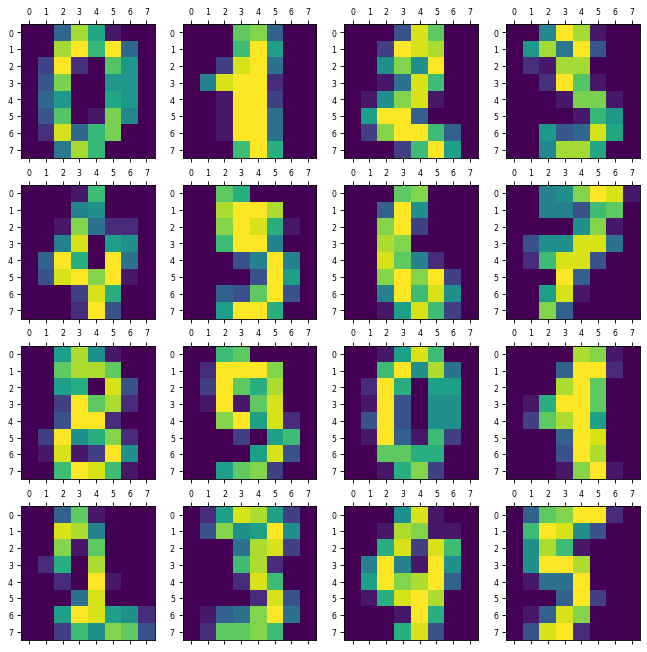

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

font = {'size'   : 7}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

for ir in range(16):
    ax1=plt.subplot(4,4,ir+1) 
    ax1.matshow(digits.images[ir])

In [18]:
X_digits=digits.data
y_digits=digits.target

Different PCA approaches are applied for [Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) data set below:

In [19]:
# linear Kernel PCA
kernel_lin = KernelPCA(n_components = 2, kernel="linear")
X_reduced = kernel_lin.fit_transform(X_digits)

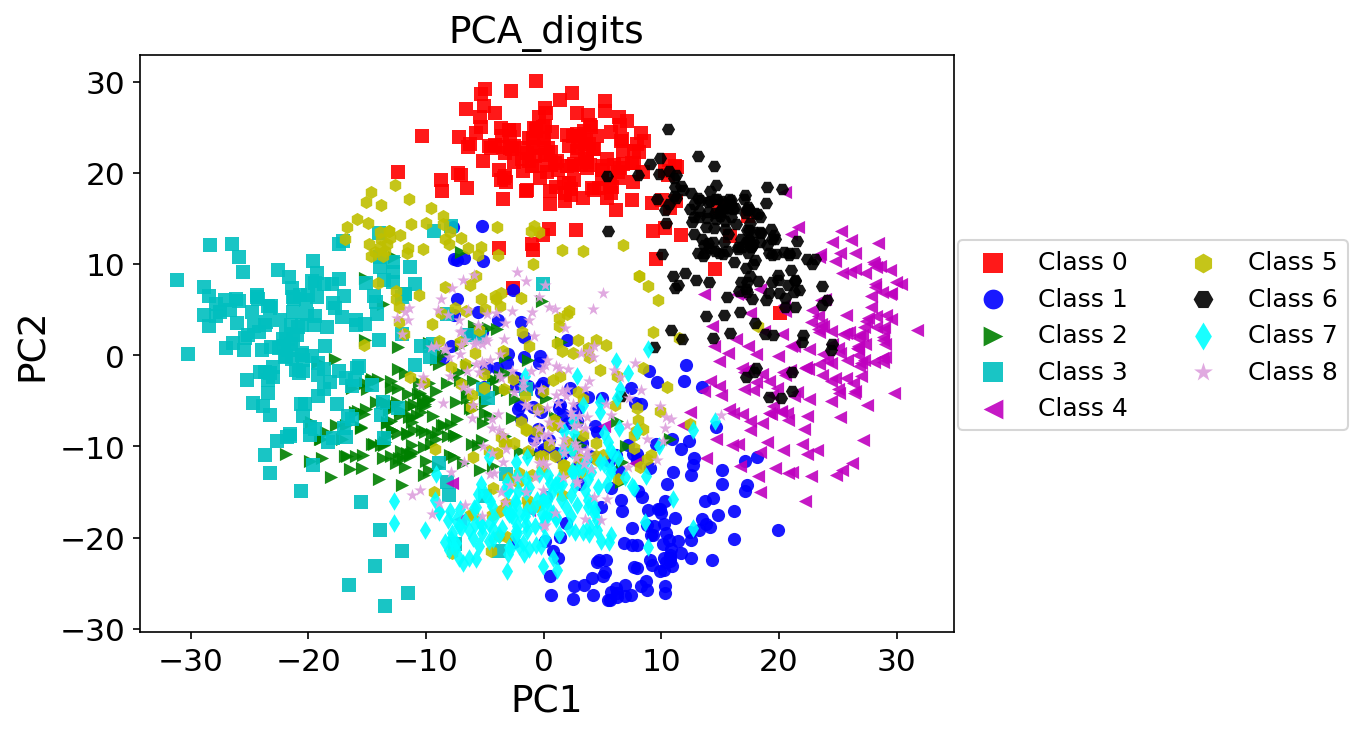

In [20]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 150, facecolor='w', edgecolor='k')

plt.scatter(X_reduced[:,0][y_digits==0], X_reduced[:,1][y_digits==0], marker='s',color='r'   
            ,s=40,lw = 0,label='Class 0',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==1], X_reduced[:,1][y_digits==1], marker='o',color='b'   
            ,s=40,lw = 0,label='Class 1',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==2], X_reduced[:,1][y_digits==2], marker='>',color='g'   
            ,s=40,lw = 0,label='Class 2',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==3], X_reduced[:,1][y_digits==3], marker=',',color='c'   
            ,s=40,lw = 0,label='Class 3',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==4], X_reduced[:,1][y_digits==4], marker='<',color='m'   
            ,s=40,lw = 0,label='Class 4',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==5], X_reduced[:,1][y_digits==5], marker='h',color='y'   
            ,s=40,lw = 0,label='Class 5',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==6], X_reduced[:,1][y_digits==6], marker='H',color='k'   
            ,s=40,lw = 0,label='Class 6',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==7], X_reduced[:,1][y_digits==7], marker='d',color='aqua'
            ,s=40,lw = 0,label='Class 7',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==8], X_reduced[:,1][y_digits==8], marker='*',color='plum'
            ,s=40,lw = 0,label='Class 8',alpha=0.9)

plt.title('PCA_digits',fontsize=18)
plt.xlabel('PC1',fontsize=18)
plt.ylabel('PC2',fontsize=18)
plt.legend(loc=1, ncol=2, fontsize=12,markerscale=1.5, bbox_to_anchor=(1.5, 0.7))
plt.show()

As can be seen, PCA does not work well for dimensionality reduction of [Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) data set.

## Optimize Hyperparameters

  Since PCA is an unsupervised learning algorithm, there is no obvious performance measure to select the best kernel and hyperparameter values. However, we can use dimensionality reduction as a preparation step for a supervised learning task, so we can simply use grid search to select the kernel and hyperparameters leading to the best performance on that task. See the pipeline below to optimize PCA for Swiss Roll data set:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
clf = Pipeline([
("kpca", KernelPCA(n_components=2)),
("rf", RandomForestRegressor())
])
param_grid = [{
"kpca__gamma": np.linspace( 0.01, 0.1, 10),
"kpca__degree":[2,3,4,5],   
"kpca__kernel": ["rbf", "sigmoid","poly"]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(swiss_roll, sr_color)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('rf', RandomForestRegressor())]),
             param_grid=[{'kpca__degree': [2, 3, 4, 5],
                          'kpca__gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                          'kpca__kernel': ['rbf', 'sigmoid', 'poly']}])

In [22]:
print(grid_search.best_params_)

{'kpca__degree': 3, 'kpca__gamma': 0.07, 'kpca__kernel': 'rbf'}


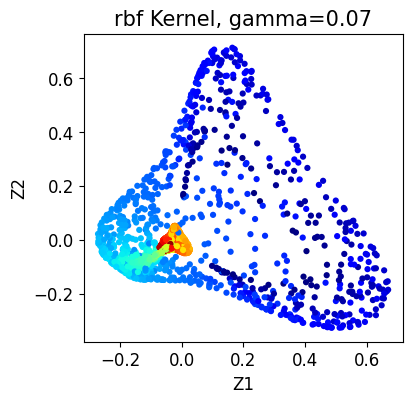

In [23]:
# sigmoid Kernel PCA
from sklearn.decomposition import KernelPCA
kernel_rbf  = KernelPCA(n_components = 2, kernel="rbf",gamma=0.07,degree=2)
pca_kernel_rbf = kernel_rbf.fit_transform(swiss_roll)

###
font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(14,4), dpi= 100, facecolor='w', edgecolor='k')

ax2=plt.subplot(1,3,1) 
plt.scatter(pca_kernel_rbf[:,0], pca_kernel_rbf[:,1],c=sr_color, marker='o',s=20,lw = 0,cmap='jet')
plt.title('rbf Kernel, gamma=0.07',fontsize=15)
plt.xlabel('Z1',fontsize=12)
plt.ylabel('Z2',fontsize=12)
plt.show()

Another approach is entirely unsupervised. We can invert the transformed PCA to original space. Then, the mean square error (MSE) between the original space and inversion is calculated. The lower the MSE is, the higher the performance of unsupervised learning

In [24]:
pca_kernel_rbf = KernelPCA(n_components = 2, kernel="rbf", degree=2, gamma=0.07,
                    fit_inverse_transform=True)
X_reduced = pca_kernel_rbf.fit_transform(swiss_roll)
X_preimage = pca_kernel_rbf.inverse_transform(X_reduced)

In [25]:
X_preimage

array([[ 1.50497122, 10.53951112,  1.25784502],
       [ 2.19984514,  9.46746108,  0.50513589],
       [ 1.50227336, 10.65447145,  1.22813936],
       ...,
       [ 2.21247374,  9.39441397,  0.50704333],
       [ 3.91336029,  7.01306853, -1.47223582],
       [ 1.81715898, 10.61808668,  0.75691347]])

Calculate MSE between inverted data and original data:

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(swiss_roll, X_preimage)

35.74960030528387

# t-SNE (t-Distributed Stochastic Neighbor Embedding)


t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

* **t-SNE vs PCA**

  First, PCA was developed in 1933 while t-SNE was developed in 2008. A lot has changed since 1933 mainly in the realm of compute and size of data. Second, PCA is a **linear dimension reduction technique** that seeks to maximize variance and preserves large pairwise distances. This may lead to poor visualization especially when dealing with **non-linear manifold** structures. t-SNE preserves small pairwise distances or local similarities while PCA preserves large pairwise distances to maximize variance. 

* **How t-SNE works**

  The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.
  
    1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space (Figure below). For each data point, we can center a Gaussian distribution over that point. Then we measure the density of all points under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. 
   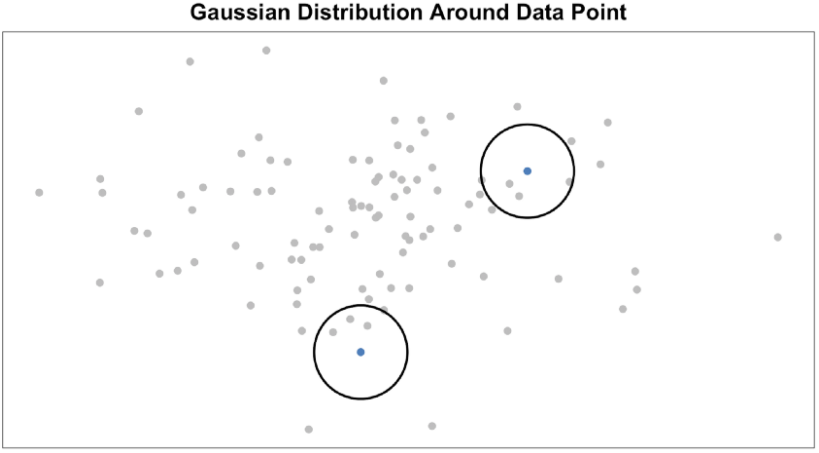
   
   
   2. Step 2 is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (Figure below). This gives us a second set of probabilities in the low dimensional space. The Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.
   
   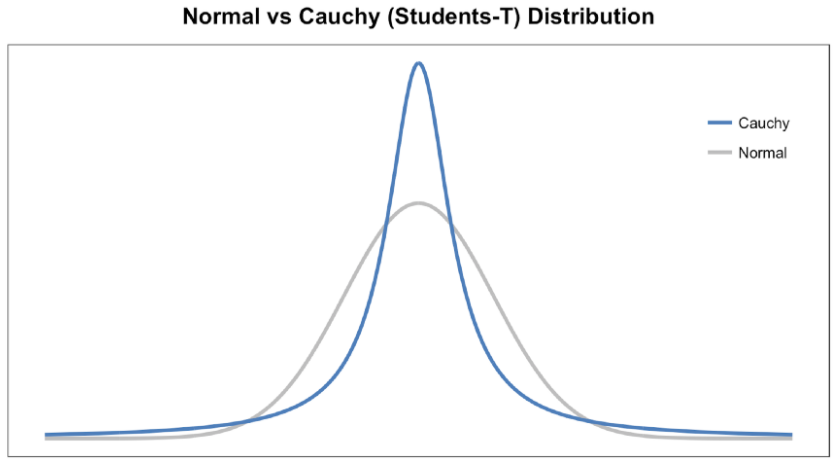
   
   
  3. The last step is that we want these set of probabilities from the low-dimensional space to reflect those of the high dimensional space as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.   

t-SNE is applied for [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) data below:

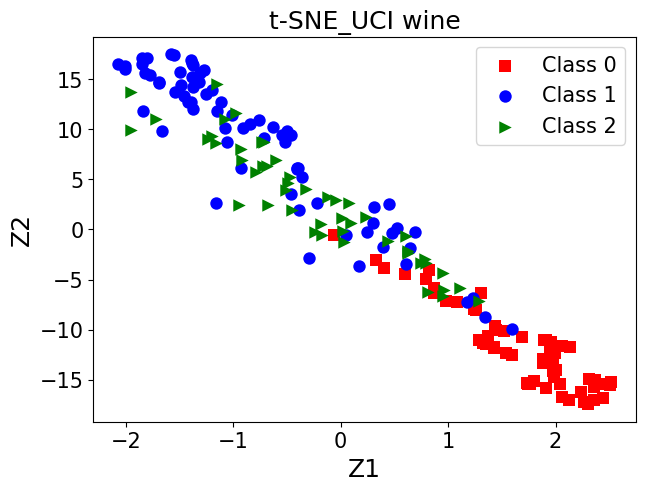

In [27]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 100, facecolor='w', edgecolor='k')

TSNE_model = TSNE(n_components=2, perplexity=30, learning_rate=15, random_state=1)
X_reduced = TSNE_model.fit_transform(X_wine)

plt.scatter(X_reduced[:,0][y_wine==0], X_reduced[:,1][y_wine==0], marker='s',color='r',s=80,lw = 0,label='Class 0')
plt.scatter(X_reduced[:,0][y_wine==1], X_reduced[:,1][y_wine==1], marker='o',color='b',s=80,lw = 0,label='Class 1')
plt.scatter(X_reduced[:,0][y_wine==2], X_reduced[:,1][y_wine==2], marker='>',color='g',s=80,lw = 0,label='Class 2')

plt.title('t-SNE_UCI wine',fontsize=18)
plt.xlabel('Z1',fontsize=18)
plt.ylabel('Z2',fontsize=18)
plt.legend()
plt.show()

As can be seen, t-SNE may not be suitable for [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) compared with PCA.

Next, t-SNE is applied for [Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) below:

In [28]:
TSNE_model = TSNE(n_components=2, perplexity=50, learning_rate=15, random_state=1)
X_reduced = TSNE_model.fit_transform(X_digits)

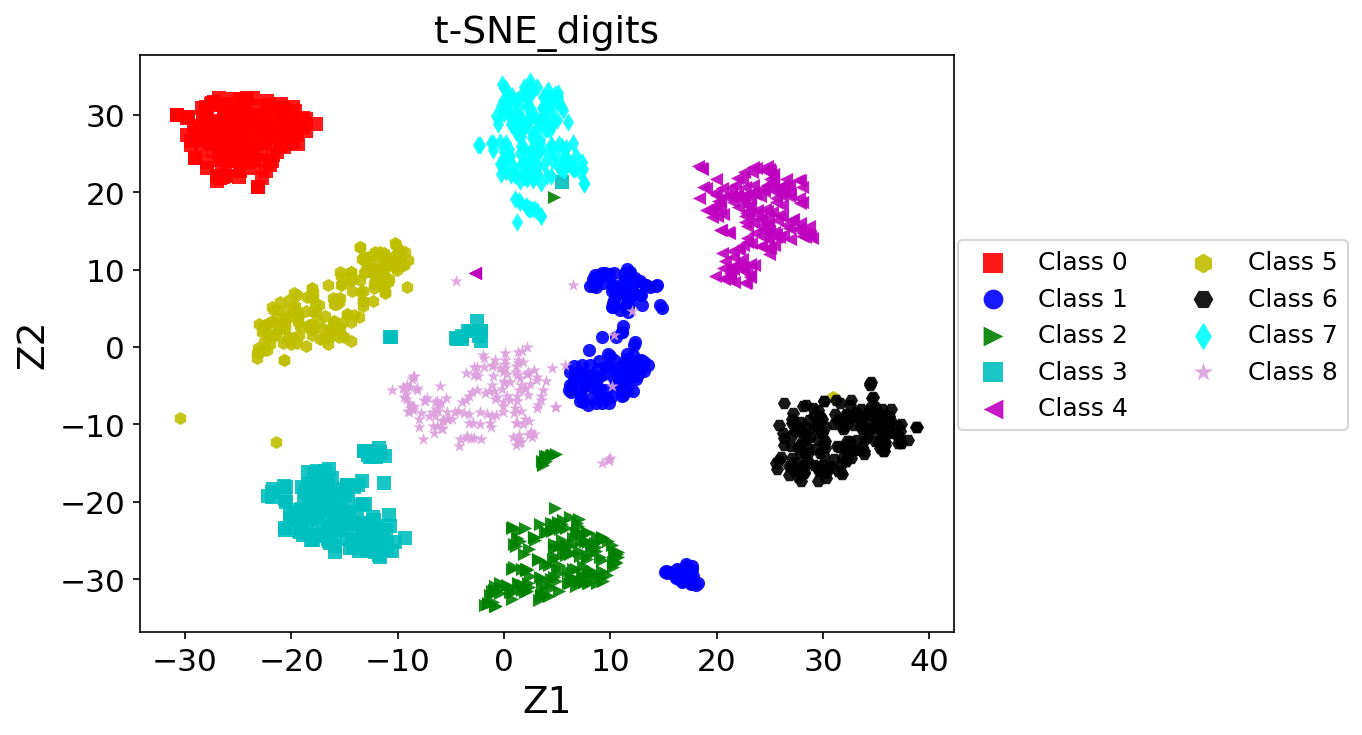

In [29]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 150, facecolor='w', edgecolor='k')

plt.scatter(X_reduced[:,0][y_digits==0], X_reduced[:,1][y_digits==0], marker='s',color='r'   
            ,s=40,lw = 0,label='Class 0',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==1], X_reduced[:,1][y_digits==1], marker='o',color='b'   
            ,s=40,lw = 0,label='Class 1',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==2], X_reduced[:,1][y_digits==2], marker='>',color='g'   
            ,s=40,lw = 0,label='Class 2',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==3], X_reduced[:,1][y_digits==3], marker=',',color='c'   
            ,s=40,lw = 0,label='Class 3',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==4], X_reduced[:,1][y_digits==4], marker='<',color='m'   
            ,s=40,lw = 0,label='Class 4',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==5], X_reduced[:,1][y_digits==5], marker='h',color='y'   
            ,s=40,lw = 0,label='Class 5',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==6], X_reduced[:,1][y_digits==6], marker='H',color='k'   
            ,s=40,lw = 0,label='Class 6',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==7], X_reduced[:,1][y_digits==7], marker='d',color='aqua'
            ,s=40,lw = 0,label='Class 7',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==8], X_reduced[:,1][y_digits==8], marker='*',color='plum'
            ,s=40,lw = 0,label='Class 8',alpha=0.9)

plt.title('t-SNE_digits',fontsize=18)
plt.xlabel('Z1',fontsize=18)
plt.ylabel('Z2',fontsize=18)
plt.legend(loc=1, ncol=2, fontsize=12,markerscale=1.5, bbox_to_anchor=(1.5, 0.7))
plt.show()

t-SNE works very well for [Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

Now we apply t-SNE for synthetic Swiss Roll:

In [30]:
clf = TSNE(n_components=2, random_state=1)
X_reduced = clf.fit_transform(swiss_roll)

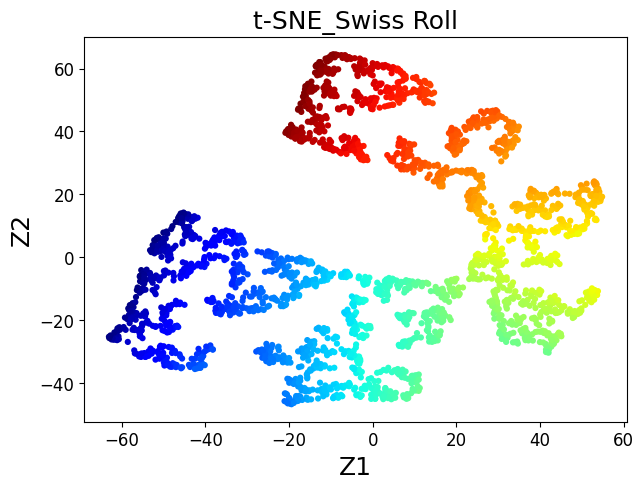

In [31]:
font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(X_reduced[:,0], X_reduced[:,1],c=sr_color, marker='o',s=20,lw = 0,cmap='jet')
plt.title('t-SNE_Swiss Roll',fontsize=18)
plt.xlabel('Z1',fontsize=18)
plt.ylabel('Z2',fontsize=18)
plt.show()

## Effective t-SNE

The question is how to fine-tune hyperparameters for t-SNE. According to [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/), the performance of SNE is fairly robust to changes in the `perplexity`, and typical values are between 5 and 50. We can always look at the t-SNE result for `perplexity`between 5 and 50 to select the most reliable one.

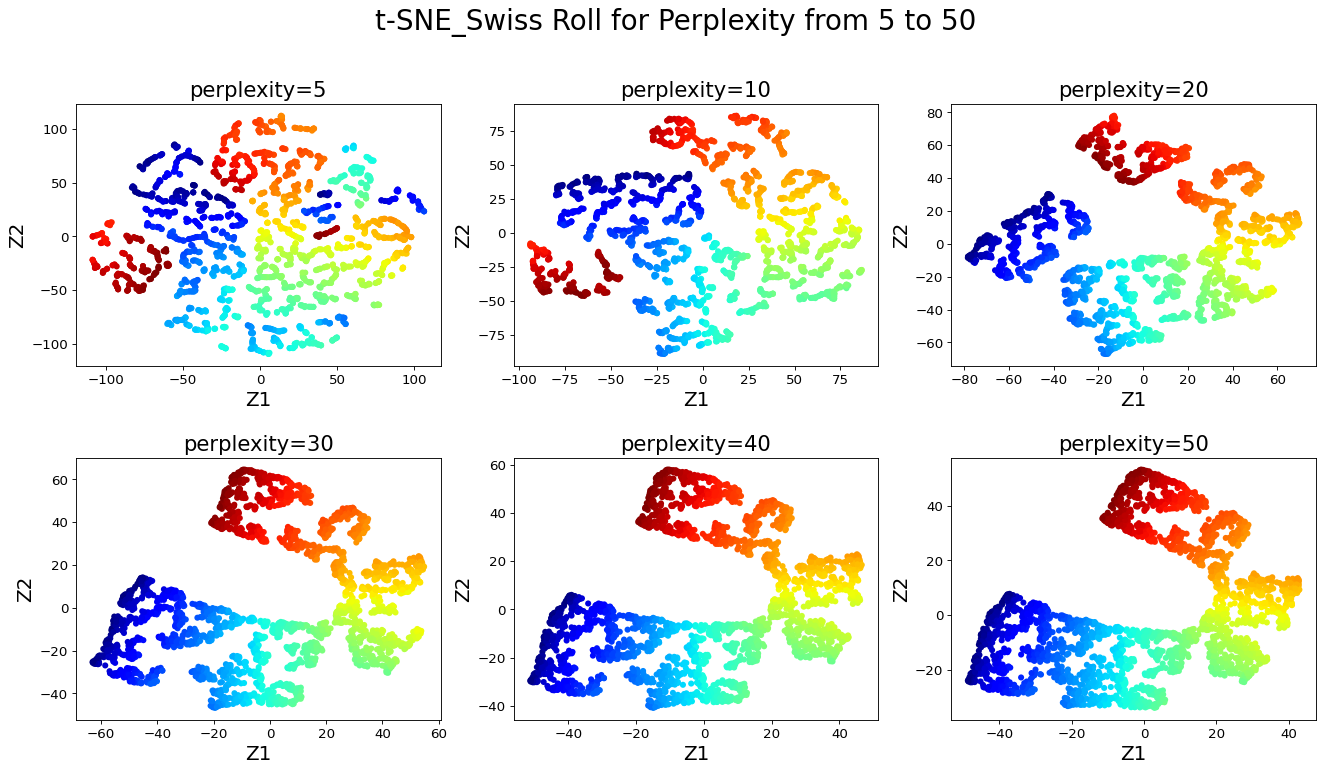

Wall time: 1min 1s


In [32]:
%%time
font = {'size'   : 12}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
no=0
for prplxty in [5,10,20,30,40,50]:
    clf = TSNE(n_components=2, random_state=1, perplexity=prplxty)
    X_reduced = clf.fit_transform(swiss_roll)
    ax1=plt.subplot(2,3,no+1) 
    plt.scatter(X_reduced[:,0], X_reduced[:,1],c=sr_color, marker='o',s=30,lw = 0,cmap='jet')
    plt.title(f'perplexity={prplxty}',fontsize=19)
    plt.xlabel('Z1',fontsize=18)
    plt.ylabel('Z2',fontsize=18)
    no+=1
#plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.35)
fig.suptitle(f't-SNE_Swiss Roll for Perplexity from 5 to 50', fontsize=25,y=1)
plt.show()

# LLE (Locally Linear Embedding)

Locally Linear Embedding (LLE) is another very powerful **nonlinear** dimensionality reduction (NLDR) technique. It is a Manifold Learning technique that does not rely on projections like the previous algorithms. In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

LLE is applied for [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) data below:

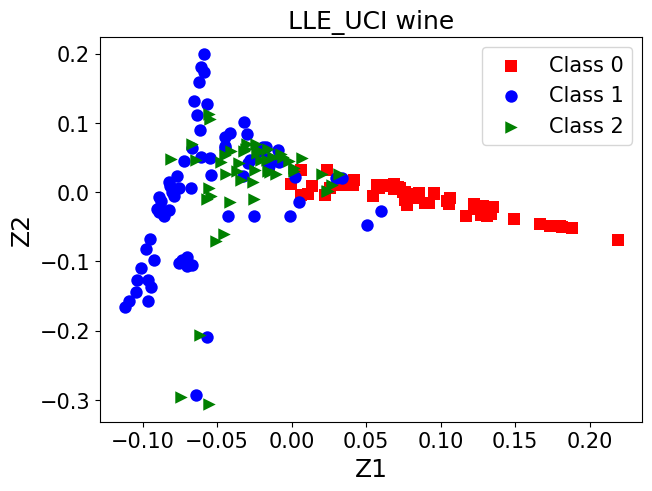

In [33]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 100, facecolor='w', edgecolor='k')

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_reduced = lle.fit_transform(X_wine)

plt.scatter(X_reduced[:,0][y_wine==0], X_reduced[:,1][y_wine==0], marker='s',color='r',s=80,lw = 0,label='Class 0')
plt.scatter(X_reduced[:,0][y_wine==1], X_reduced[:,1][y_wine==1], marker='o',color='b',s=80,lw = 0,label='Class 1')
plt.scatter(X_reduced[:,0][y_wine==2], X_reduced[:,1][y_wine==2], marker='>',color='g',s=80,lw = 0,label='Class 2')

plt.title('LLE_UCI wine',fontsize=18)
plt.xlabel('Z1',fontsize=18)
plt.ylabel('Z2',fontsize=18)
plt.legend()
plt.show()

Dimensionality reduction with LLE for [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) has less performance than PCA.

Next, LLE is applied for Swiss Roll data:

In [34]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=50)
X_reduced = lle.fit_transform(swiss_roll)

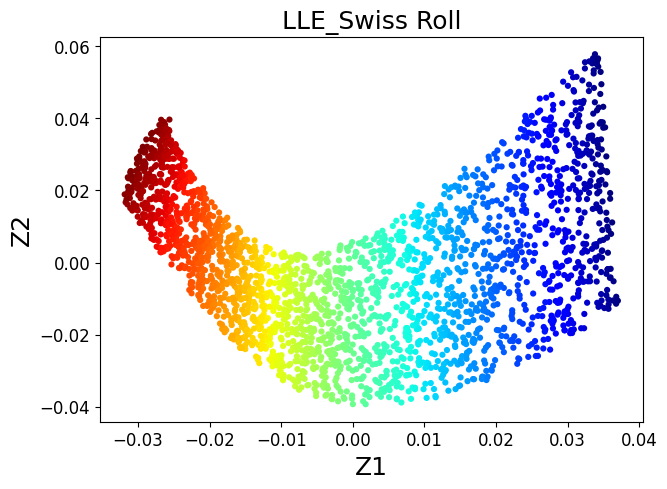

In [35]:
font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(X_reduced[:,0], X_reduced[:,1],c=sr_color, marker='o',s=20,lw = 0,cmap='jet')
plt.title('LLE_Swiss Roll',fontsize=18)
plt.xlabel('Z1',fontsize=18)
plt.ylabel('Z2',fontsize=18)
plt.show()

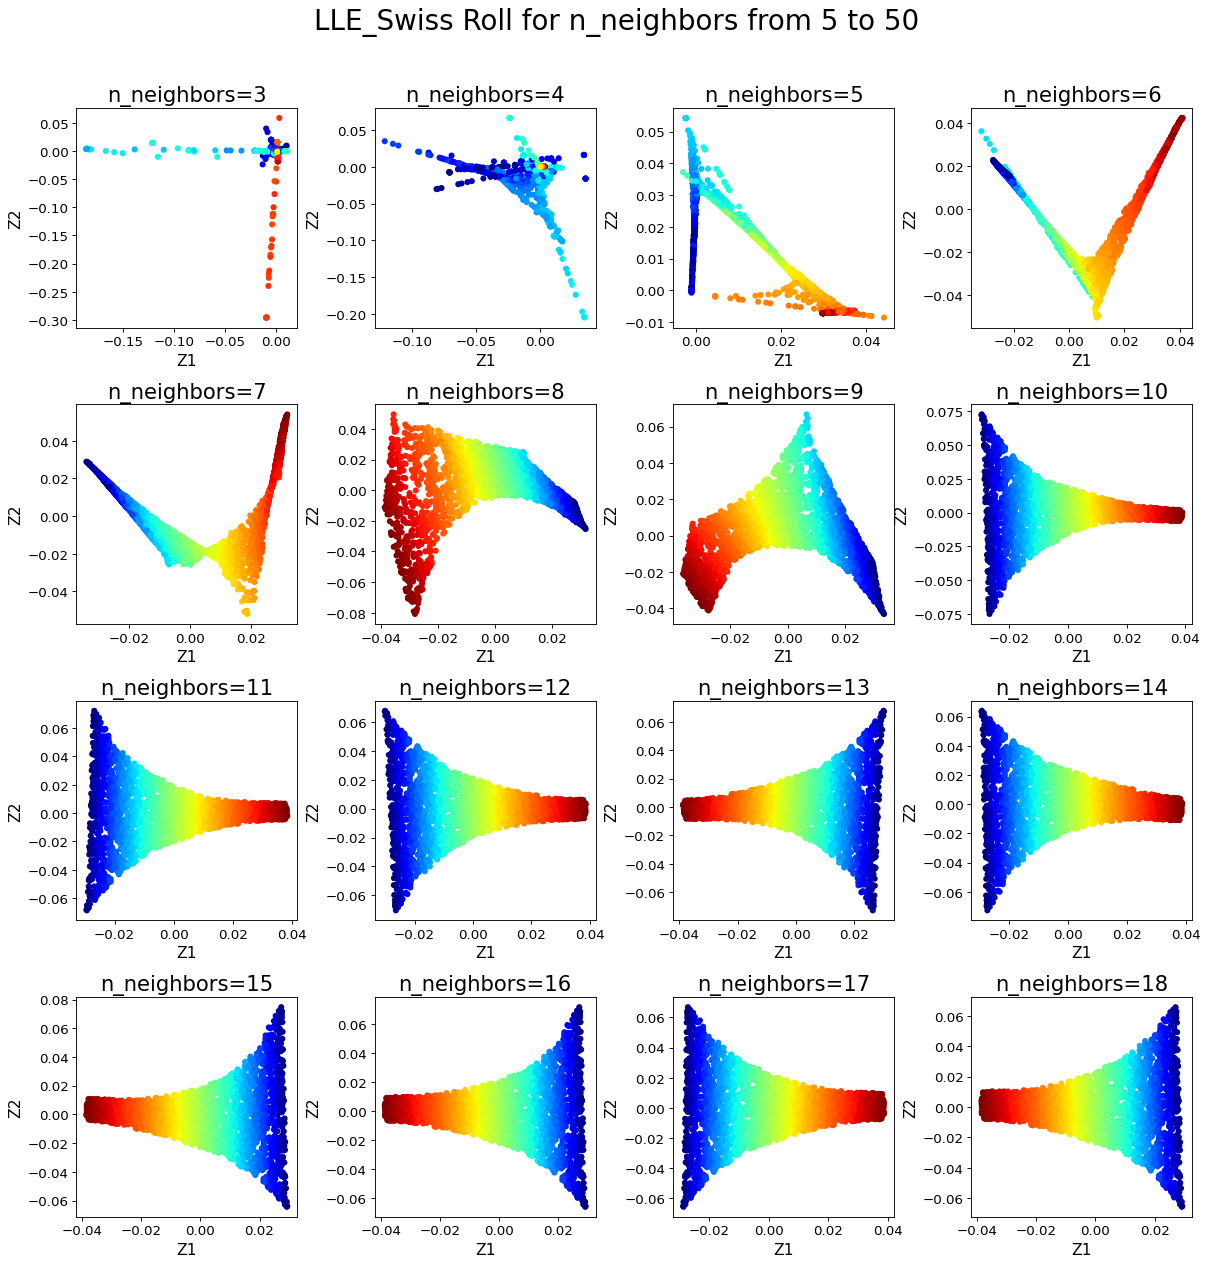

Wall time: 5.18 s


In [36]:
%%time
font = {'size'   : 12}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(18, 18), dpi= 80, facecolor='w', edgecolor='k')
no=0
for n_nghbrs in np.arange(3,19,1):
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_nghbrs)
    X_reduced = lle.fit_transform(swiss_roll) 
    ax1=plt.subplot(4,4,no+1) 
    plt.scatter(X_reduced[:,0], X_reduced[:,1],c=sr_color, marker='o',s=30,lw = 0,cmap='jet')
    plt.title(f'n_neighbors={n_nghbrs}',fontsize=19)
    plt.xlabel('Z1',fontsize=14)
    plt.ylabel('Z2',fontsize=14)
    no+=1
plt.subplots_adjust(wspace=0.35)
plt.subplots_adjust(hspace=0.35)
fig.suptitle(f'LLE_Swiss Roll for n_neighbors from 5 to 50', fontsize=25,y=0.95)
plt.show()

lastly, LLE is applied for [Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) data set:

In [37]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_reduced = lle.fit_transform(X_digits)

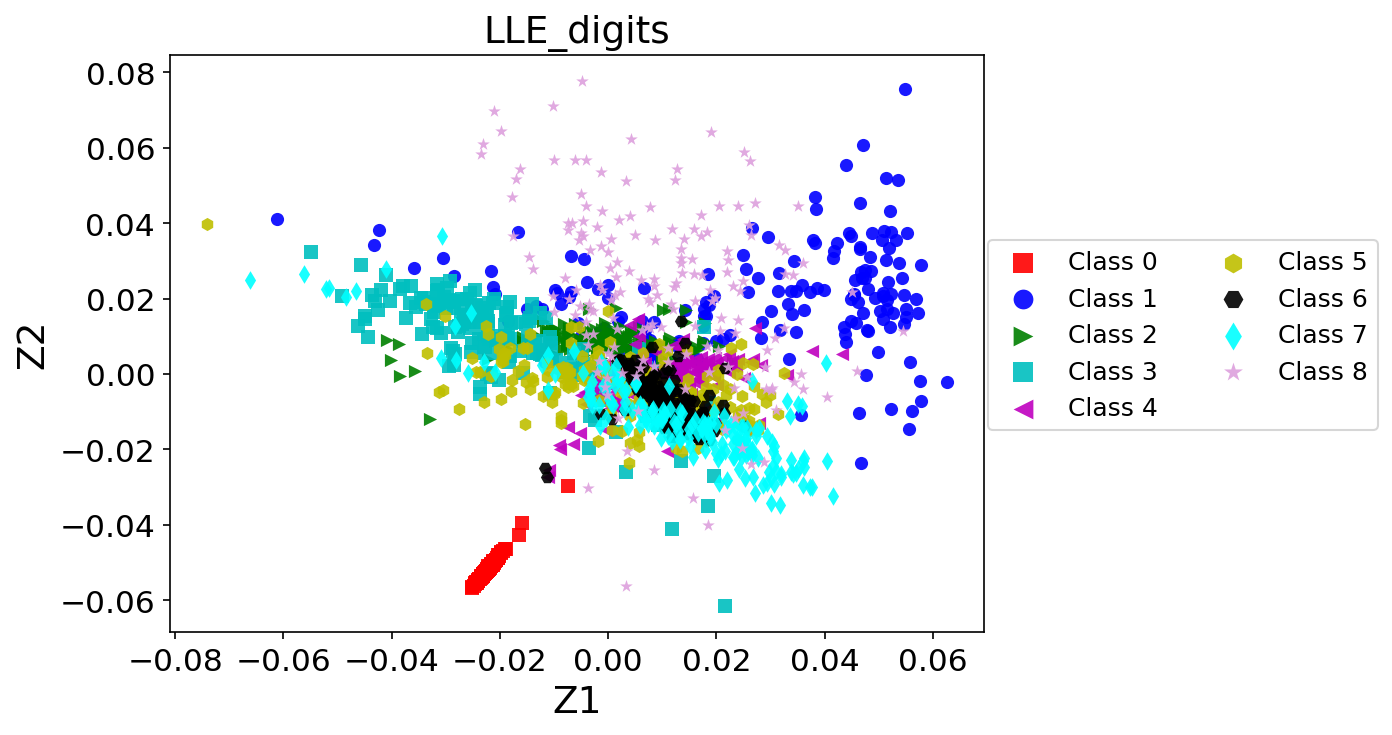

In [38]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 150, facecolor='w', edgecolor='k')

plt.scatter(X_reduced[:,0][y_digits==0], X_reduced[:,1][y_digits==0], marker='s',color='r'   
            ,s=40,lw = 0,label='Class 0',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==1], X_reduced[:,1][y_digits==1], marker='o',color='b'   
            ,s=40,lw = 0,label='Class 1',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==2], X_reduced[:,1][y_digits==2], marker='>',color='g'   
            ,s=40,lw = 0,label='Class 2',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==3], X_reduced[:,1][y_digits==3], marker=',',color='c'   
            ,s=40,lw = 0,label='Class 3',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==4], X_reduced[:,1][y_digits==4], marker='<',color='m'   
            ,s=40,lw = 0,label='Class 4',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==5], X_reduced[:,1][y_digits==5], marker='h',color='y'   
            ,s=40,lw = 0,label='Class 5',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==6], X_reduced[:,1][y_digits==6], marker='H',color='k'   
            ,s=40,lw = 0,label='Class 6',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==7], X_reduced[:,1][y_digits==7], marker='d',color='aqua'
            ,s=40,lw = 0,label='Class 7',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==8], X_reduced[:,1][y_digits==8], marker='*',color='plum'
            ,s=40,lw = 0,label='Class 8',alpha=0.9)

plt.title('LLE_digits',fontsize=18)
plt.xlabel('Z1',fontsize=18)
plt.ylabel('Z2',fontsize=18)
plt.legend(loc=1, ncol=2, fontsize=12,markerscale=1.5, bbox_to_anchor=(1.5, 0.7))
plt.show()

As shown above, LLE can not reliably reduce dimension for [Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) data set

# LDA (Linear Discriminant Analysis) (supervised)

Unlike PCA and t-SNE, LDA (Linear Discriminant Analysis) is a supervised learning for classification machine learning algorithm: LDA is a good technique to reduce dimensionality before running another classification algorithm. Therefore, it requires target.

LDA works by calculating summary statistics for the input features by class label, such as the mean and standard deviation. These statistics represent the model learned from the training data. Predictions are made by estimating the probability that a new example belongs to each class label based on the values of each input feature. The class that results in the largest probability is then assigned to the example. As such, LDA may be considered a simple application of **Bayes Theorem** for classification.



 LDA assumes that the input variables are numeric and normally distributed and that they have the same variance (spread). If this is not the case, it could be desirable to transform the data to have a Gaussian distribution and standardize or normalize the data prior to modeling. It also assumes that the input variables are not correlated; if they are, a PCA transform may be helpful to remove the linear dependence. Nevertheless, the model can perform well, even when violating these expectations.

The LDA model is naturally multi-class. This means that it supports two-class classification problems and extends to more than two classes (multi-class classification) without modification or augmentation.

LDA is applied for [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) data below:

In [39]:
LDA = LinearDiscriminantAnalysis(n_components=2)
X_reduced = LDA.fit_transform(X_wine, y_wine)

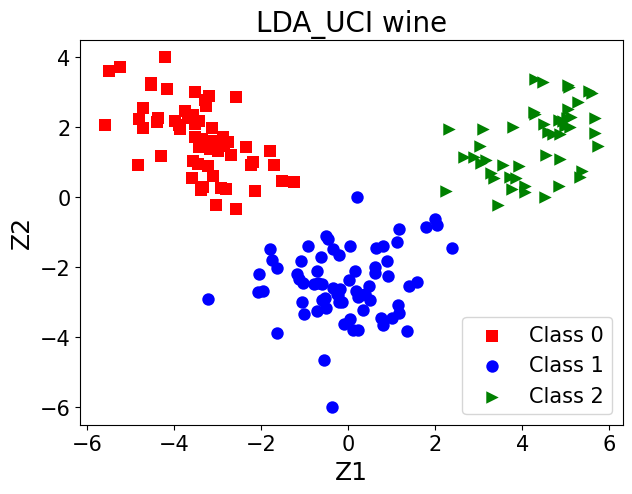

In [40]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(X_reduced[:,0][y_wine==0], X_reduced[:,1][y_wine==0], marker='s',color='r',s=80,lw = 0,label='Class 0')
plt.scatter(X_reduced[:,0][y_wine==1], X_reduced[:,1][y_wine==1], marker='o',color='b',s=80,lw = 0,label='Class 1')
plt.scatter(X_reduced[:,0][y_wine==2], X_reduced[:,1][y_wine==2], marker='>',color='g',s=80,lw = 0,label='Class 2')

plt.title('LDA_UCI wine',fontsize=20)
plt.xlabel('Z1',fontsize=18)
plt.ylabel('Z2',fontsize=18)
plt.legend(loc=4)
plt.show()

As can be seen, LDA works very well to reduce dimension for [UCI wine](https://archive.ics.uci.edu/ml/datasets/wine) data set.

Next, LDA is applied for Handwritten Digits [Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) data set.

In [41]:
LDA = LinearDiscriminantAnalysis(n_components=2)
X_reduced = LDA.fit_transform(X_digits,y_digits)

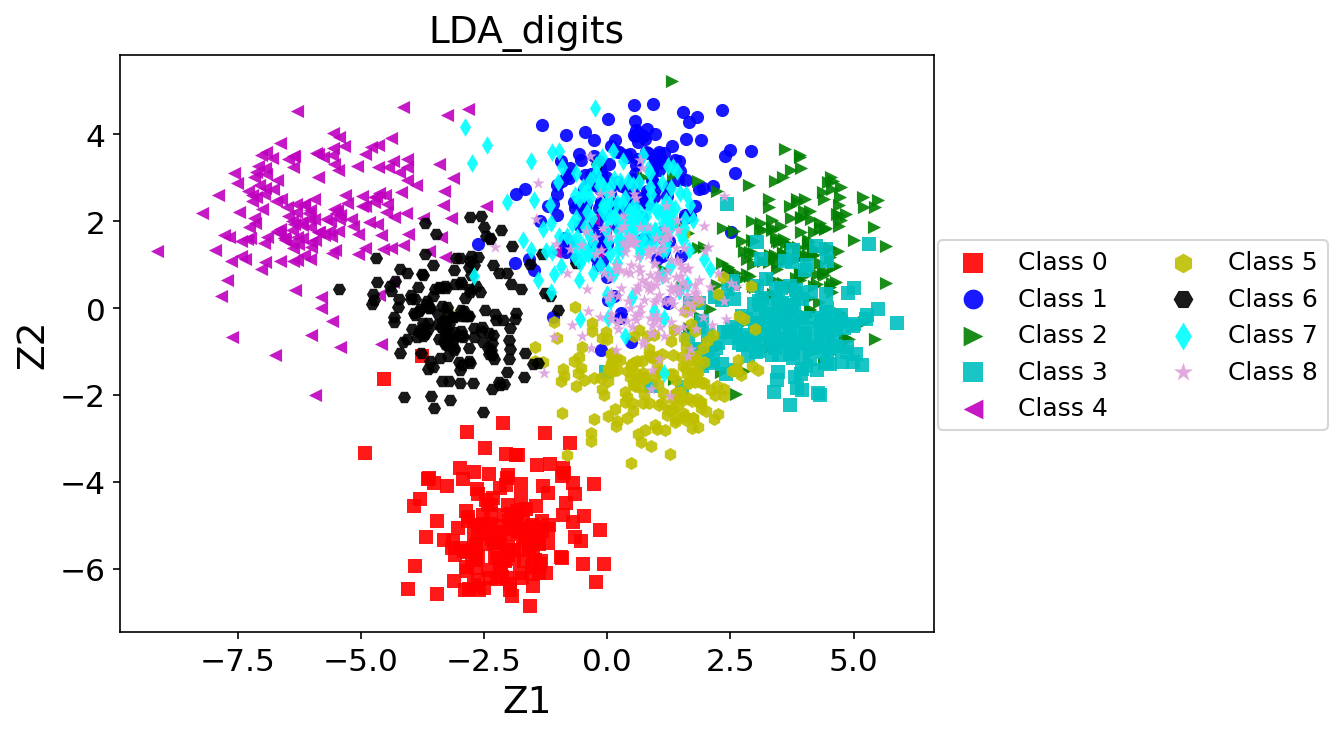

In [42]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 150, facecolor='w', edgecolor='k')

plt.scatter(X_reduced[:,0][y_digits==0], X_reduced[:,1][y_digits==0], marker='s',color='r'   
            ,s=40,lw = 0,label='Class 0',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==1], X_reduced[:,1][y_digits==1], marker='o',color='b'   
            ,s=40,lw = 0,label='Class 1',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==2], X_reduced[:,1][y_digits==2], marker='>',color='g'   
            ,s=40,lw = 0,label='Class 2',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==3], X_reduced[:,1][y_digits==3], marker=',',color='c'   
            ,s=40,lw = 0,label='Class 3',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==4], X_reduced[:,1][y_digits==4], marker='<',color='m'   
            ,s=40,lw = 0,label='Class 4',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==5], X_reduced[:,1][y_digits==5], marker='h',color='y'   
            ,s=40,lw = 0,label='Class 5',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==6], X_reduced[:,1][y_digits==6], marker='H',color='k'   
            ,s=40,lw = 0,label='Class 6',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==7], X_reduced[:,1][y_digits==7], marker='d',color='aqua'
            ,s=40,lw = 0,label='Class 7',alpha=0.9)
plt.scatter(X_reduced[:,0][y_digits==8], X_reduced[:,1][y_digits==8], marker='*',color='plum'
            ,s=40,lw = 0,label='Class 8',alpha=0.9)

plt.title('LDA_digits',fontsize=18)
plt.xlabel('Z1',fontsize=18)
plt.ylabel('Z2',fontsize=18)
plt.legend(loc=1, ncol=2, fontsize=12,markerscale=1.5, bbox_to_anchor=(1.5, 0.7))
plt.show()

As we saw, both PCA, LLE and LDA didn't perform well on separating high-dimensional data such as image data e.g.[Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) data se. 